# Analyse paradoxe de Simpson

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import numpy
from sklearn.linear_model import LogisticRegression

## Importation données

In [2]:
data_url = "https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/-/raw/master/module3/Practical_session/Subject6_smoking.csv?inline=false"

Pour nous protéger contre une éventuelle disparition ou modification du serveur du Réseau Sentinelles, nous faisons une copie locale de ce jeux de données que nous préservons avec notre analyse. Nous téléchargeons les données seulement si la copie locale n'existe pas.

In [3]:
data_file = "donnees-Simpson.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

In [4]:
raw_data = pd.read_csv(data_file)
raw_data

Smoker Status   Age
0       Yes  Alive  21.0
1       Yes  Alive  19.3
2        No   Dead  57.5
3        No  Alive  47.1
4       Yes  Alive  81.4
5        No  Alive  36.8
6        No  Alive  23.8
7       Yes   Dead  57.5
8       Yes  Alive  24.8
9       Yes  Alive  49.5
10      Yes  Alive  30.0
11       No   Dead  66.0
12      Yes  Alive  49.2
13       No  Alive  58.4
14       No   Dead  60.6
15       No  Alive  25.1
16       No  Alive  43.5
17       No  Alive  27.1
18       No  Alive  58.3
19      Yes  Alive  65.7
20       No   Dead  73.2
21      Yes  Alive  38.3
22       No  Alive  33.4
23      Yes   Dead  62.3
24       No  Alive  18.0
25       No  Alive  56.2
26      Yes  Alive  59.2
27       No  Alive  25.8
28       No   Dead  36.9
29       No  Alive  20.2
...     ...    ...   ...
1284    Yes   Dead  36.0
1285    Yes  Alive  48.3
1286     No  Alive  63.1
1287     No  Alive  60.8
1288    Yes   Dead  39.3
1289     No  Alive  36.7
1290     No  Alive  63.8
1291     No   Dead  71.3
1292     No  Alive  57.7
1293     No  Alive  63.2
1294     No  Alive  46.6
1295    Yes   Dead  82.4
1296    Yes  Alive  38.3
1297    Yes  Alive  32.7
1298     No  Alive  39.7
1299    Yes   Dead  60.0
1300     No   Dead  71.0
1301     No  Alive  20.5
1302     No  Alive  44.4
1303    Yes  Alive  31.2
1304    Yes  Alive  47.8
1305    Yes  Alive  60.9
1306     No   Dead  61.4
1307    Yes  Alive  43.0
1308     No  Alive  42.1
1309    Yes  Alive  35.9
1310     No  Alive  22.3
1311    Yes   Dead  62.1
1312     No   Dead  88.6
1313     No  Alive  39.1

[1314 rows x 3 columns]

On cherche s'il y a des donnees vides, et on les supprime s'il y en a

In [5]:
raw_data[raw_data.isnull().any(axis=1)]
data = raw_data.dropna().copy()
data

Smoker Status   Age
0       Yes  Alive  21.0
1       Yes  Alive  19.3
2        No   Dead  57.5
3        No  Alive  47.1
4       Yes  Alive  81.4
5        No  Alive  36.8
6        No  Alive  23.8
7       Yes   Dead  57.5
8       Yes  Alive  24.8
9       Yes  Alive  49.5
10      Yes  Alive  30.0
11       No   Dead  66.0
12      Yes  Alive  49.2
13       No  Alive  58.4
14       No   Dead  60.6
15       No  Alive  25.1
16       No  Alive  43.5
17       No  Alive  27.1
18       No  Alive  58.3
19      Yes  Alive  65.7
20       No   Dead  73.2
21      Yes  Alive  38.3
22       No  Alive  33.4
23      Yes   Dead  62.3
24       No  Alive  18.0
25       No  Alive  56.2
26      Yes  Alive  59.2
27       No  Alive  25.8
28       No   Dead  36.9
29       No  Alive  20.2
...     ...    ...   ...
1284    Yes   Dead  36.0
1285    Yes  Alive  48.3
1286     No  Alive  63.1
1287     No  Alive  60.8
1288    Yes   Dead  39.3
1289     No  Alive  36.7
1290     No  Alive  63.8
1291     No   Dead  71.3
1292     No  Alive  57.7
1293     No  Alive  63.2
1294     No  Alive  46.6
1295    Yes   Dead  82.4
1296    Yes  Alive  38.3
1297    Yes  Alive  32.7
1298     No  Alive  39.7
1299    Yes   Dead  60.0
1300     No   Dead  71.0
1301     No  Alive  20.5
1302     No  Alive  44.4
1303    Yes  Alive  31.2
1304    Yes  Alive  47.8
1305    Yes  Alive  60.9
1306     No   Dead  61.4
1307    Yes  Alive  43.0
1308     No  Alive  42.1
1309    Yes  Alive  35.9
1310     No  Alive  22.3
1311    Yes   Dead  62.1
1312     No   Dead  88.6
1313     No  Alive  39.1

[1314 rows x 3 columns]

## Premiere analyse

Il n y a pas de ligne vide. On peut commencer l analyse en calculant le nombre de fumeurs vivants ou morts, ainsi que le nombre de non-fumeurs vivants ou morts.

In [6]:
smoker_alive = 0
smoker_dead = 0
no_smoker_alive = 0
no_smoker_dead = 0
for it in range(len(data)):
    if(data["Smoker"][it]=="Yes" and data["Status"][it]=="Alive"):
        smoker_alive = smoker_alive + 1
    if(data["Smoker"][it]=="Yes" and data["Status"][it]=="Dead"):
        smoker_dead = smoker_dead + 1
    if(data["Smoker"][it]=="No" and data["Status"][it]=="Alive"):
        no_smoker_alive = no_smoker_alive + 1
    if(data["Smoker"][it]=="No" and data["Status"][it]=="Dead"):
        no_smoker_dead = no_smoker_dead + 1

On met en forme ces donnees dans un tableau

In [7]:
tableau = [ { "-":"Alive", "Smoker":smoker_alive, "Non Smoker":no_smoker_alive },
      { "-":"Dead", "Smoker":smoker_dead, "Non Smoker":no_smoker_dead },]
df = pd.DataFrame(tableau)
df

-  Non Smoker  Smoker
0  Alive         502     443
1   Dead         230     139

Calcul du taux de mortalité des deux groupes (Fumeurs et Non Fumeurs) et on ajout à notre tableau

In [8]:
smoker_mortality_rate = int(100*smoker_dead/(smoker_alive+smoker_dead))
no_smoker_mortality_rate = int(100*no_smoker_dead/(no_smoker_alive+no_smoker_dead))

tableau = [ { "-":"Alive", "Smoker":smoker_alive, "Non Smoker":no_smoker_alive },
      { "-":"Dead", "Smoker":smoker_dead, "Non Smoker":no_smoker_dead }, 
           { "-":"Mortality (%)", "Smoker":smoker_mortality_rate, "Non Smoker":no_smoker_mortality_rate }]
df = pd.DataFrame(tableau)
df

-  Non Smoker  Smoker
0          Alive         502     443
1           Dead         230     139
2  Mortality (%)          31      23

Ce resultat est surprenant, on voit que le taux de mortalité est plus élevé chez les personnes déclarées comme "Non-Fumeurs".
On s'attendrait à voir le résultat inverse.

## Deuxieme analyse

On fait une seconde analyse, en séparant les données par classe d'age. 4 classes d'age sont ainsi définies : 18-34 ans, 35-54 ans, 55-64 ans, plus de 65 ans.

In [9]:
smoker_alive_18_34 = 0
smoker_dead_18_34 = 0
no_smoker_alive_18_34 = 0
no_smoker_dead_18_34 = 0

smoker_alive_35_54 = 0
smoker_dead_35_54 = 0
no_smoker_alive_35_54 = 0
no_smoker_dead_35_54 = 0

smoker_alive_55_64 = 0
smoker_dead_55_64 = 0
no_smoker_alive_55_64 = 0
no_smoker_dead_55_64 = 0

smoker_alive_65 = 0
smoker_dead_65 = 0
no_smoker_alive_65 = 0
no_smoker_dead_65 = 0

for it in range(len(data)):
    if(data["Age"][it]<=34):
        if(data["Smoker"][it]=="Yes" and data["Status"][it]=="Alive"):
            smoker_alive_18_34 = smoker_alive_18_34 + 1
        if(data["Smoker"][it]=="Yes" and data["Status"][it]=="Dead"):
            smoker_dead_18_34 = smoker_dead_18_34 + 1
        if(data["Smoker"][it]=="No" and data["Status"][it]=="Alive"):
            no_smoker_alive_18_34 = no_smoker_alive_18_34 + 1
        if(data["Smoker"][it]=="No" and data["Status"][it]=="Dead"):
            no_smoker_dead_18_34 = no_smoker_dead_18_34 + 1
    
    if(data["Age"][it]>34 and data["Age"][it]<=54):
        if(data["Smoker"][it]=="Yes" and data["Status"][it]=="Alive"):
            smoker_alive_35_54 = smoker_alive_35_54 + 1
        if(data["Smoker"][it]=="Yes" and data["Status"][it]=="Dead"):
            smoker_dead_35_54 = smoker_dead_35_54 + 1
        if(data["Smoker"][it]=="No" and data["Status"][it]=="Alive"):
            no_smoker_alive_35_54 = no_smoker_alive_35_54 + 1
        if(data["Smoker"][it]=="No" and data["Status"][it]=="Dead"):
            no_smoker_dead_35_54 = no_smoker_dead_35_54 + 1
    
    if(data["Age"][it]>54 and data["Age"][it]<=64):
        if(data["Smoker"][it]=="Yes" and data["Status"][it]=="Alive"):
            smoker_alive_55_64 = smoker_alive_55_64 + 1
        if(data["Smoker"][it]=="Yes" and data["Status"][it]=="Dead"):
            smoker_dead_55_64 = smoker_dead_55_64 + 1
        if(data["Smoker"][it]=="No" and data["Status"][it]=="Alive"):
            no_smoker_alive_55_64 = no_smoker_alive_55_64 + 1
        if(data["Smoker"][it]=="No" and data["Status"][it]=="Dead"):
            no_smoker_dead_55_64 = no_smoker_dead_55_64 + 1
    
    if(data["Age"][it]>64):
        if(data["Smoker"][it]=="Yes" and data["Status"][it]=="Alive"):
            smoker_alive_65 = smoker_alive_65 + 1
        if(data["Smoker"][it]=="Yes" and data["Status"][it]=="Dead"):
            smoker_dead_65 = smoker_dead_65 + 1
        if(data["Smoker"][it]=="No" and data["Status"][it]=="Alive"):
            no_smoker_alive_65 = no_smoker_alive_65 + 1
        if(data["Smoker"][it]=="No" and data["Status"][it]=="Dead"):
            no_smoker_dead_65 = no_smoker_dead_65 + 1

smoker_18_34_mortality_rate = int(100*smoker_dead_18_34/(smoker_alive_18_34+smoker_dead_18_34))
no_smoker_18_34_mortality_rate = int(100*no_smoker_dead_18_34/(no_smoker_alive_18_34+no_smoker_dead_18_34))

smoker_35_54_mortality_rate = int(100*smoker_dead_35_54/(smoker_alive_35_54+smoker_dead_35_54))
no_smoker_35_54_mortality_rate = int(100*no_smoker_dead_35_54/(no_smoker_alive_35_54+no_smoker_dead_35_54))

smoker_55_64_mortality_rate = int(100*smoker_dead_55_64/(smoker_alive_55_64+smoker_dead_55_64))
no_smoker_55_64_mortality_rate = int(100*no_smoker_dead_55_64/(no_smoker_alive_55_64+no_smoker_dead_55_64))

smoker_65_mortality_rate = int(100*smoker_dead_65/(smoker_alive_65+smoker_dead_65))
no_smoker_65_mortality_rate = int(100*no_smoker_dead_65/(no_smoker_alive_65+no_smoker_dead_65))

On peut maintenant mettre ces donnees dans un tableau pour les visualiser

In [10]:
tableau_2 = [ { "-":"Alive (18-34)", "Smoker":smoker_alive_18_34, "Non Smoker":no_smoker_alive_18_34 },
      { "-":"Dead (18-34)", "Smoker":smoker_dead_18_34, "Non Smoker":no_smoker_dead_18_34 }, 
           { "-":"Mortality (18-34(%))", "Smoker":smoker_18_34_mortality_rate, "Non Smoker":no_smoker_18_34_mortality_rate },
            { "-":"Alive (35-54)", "Smoker":smoker_alive_35_54, "Non Smoker":no_smoker_alive_35_54 },
      { "-":"Dead (35-54)", "Smoker":smoker_dead_35_54, "Non Smoker":no_smoker_dead_35_54 }, 
           { "-":"Mortality (35-54(%))", "Smoker":smoker_35_54_mortality_rate, "Non Smoker":no_smoker_35_54_mortality_rate },
            { "-":"Alive (55-64)", "Smoker":smoker_alive_55_64, "Non Smoker":no_smoker_alive_55_64 },
      { "-":"Dead (55-64)", "Smoker":smoker_dead_55_64, "Non Smoker":no_smoker_dead_55_64 }, 
           { "-":"Mortality (55-64(%))", "Smoker":smoker_55_64_mortality_rate, "Non Smoker":no_smoker_55_64_mortality_rate },
            { "-":"Alive (65+)", "Smoker":smoker_alive_65, "Non Smoker":no_smoker_alive_65 },
      { "-":"Dead (65+)", "Smoker":smoker_dead_65, "Non Smoker":no_smoker_dead_65 }, 
           { "-":"Mortality (65+(%))", "Smoker":smoker_65_mortality_rate, "Non Smoker":no_smoker_65_mortality_rate }]
df_2 = pd.DataFrame(tableau_2)
df_2

-  Non Smoker  Smoker
0          Alive (18-34)         213     176
1           Dead (18-34)           6       5
2   Mortality (18-34(%))           2       2
3          Alive (35-54)         180     196
4           Dead (35-54)          19      41
5   Mortality (35-54(%))           9      17
6          Alive (55-64)          81      64
7           Dead (55-64)          40      51
8   Mortality (55-64(%))          33      44
9            Alive (65+)          28       7
10            Dead (65+)         165      42
11    Mortality (65+(%))          85      85

On va représenter graphiquement la mortalité en fonction de la tranche d'age afin de simplifier l'analyse

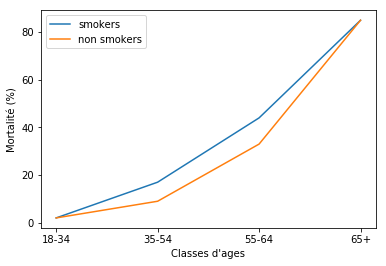

In [11]:
smoker_mortality = [smoker_18_34_mortality_rate,smoker_35_54_mortality_rate,
                    smoker_55_64_mortality_rate,smoker_65_mortality_rate]
no_smoker_mortality = [no_smoker_18_34_mortality_rate,no_smoker_35_54_mortality_rate,
                    no_smoker_55_64_mortality_rate,no_smoker_65_mortality_rate]
ages = ["18-34","35-54","55-64","65+"]

fig = plt.figure()
plt.plot(ages,smoker_mortality,label = "smokers")
plt.plot(ages,no_smoker_mortality,label = "non smokers")
plt.xlabel("Classes d'ages")
plt.ylabel("Mortalité (%)")
plt.legend()
plt.show()

On voit que pour les deux classes d'ages 18-34 et 65+, le taux de mortalité est le même pour les fumeurs et les non-fumeurs. En revanche, pour les classes d'age 35-54 et 55-64, le taux de mortalité des fumeurs est nettement plus élevé que celui des non-fumeurs. Cela peut s'expliquer par le fait que l'age est un critère qui influe sur le taux de mortalité.

## Troisieme analyse

Afin de quantifier l impact de l age sur la mortalite, nous allons realiser une regression logistique. Nous pourrons ainsi analyser les donnees de mortalité lié au tabagisme sans être induit en erreur par la classification par age.

In [15]:
sorted_data = data.sort_values("Age")

Bool_Death_smoker = []
Bool_Death_no_smoker = []
Ages_smoker = []
Ages_no_smoker = []

for it in range(len(sorted_data)):
    if(sorted_data["Status"][it]=="Alive" and sorted_data["Smoker"][it]=="Yes"):
        Bool_Death_smoker.append(1)
        Ages_smoker.append(sorted_data["Age"][it])
    if(sorted_data["Status"][it]=="Dead" and sorted_data["Smoker"][it]=="Yes"):
        Bool_Death_smoker.append(0)
        Ages_smoker.append(sorted_data["Age"][it])
    if(sorted_data["Status"][it]=="Alive" and sorted_data["Smoker"][it]=="No"):
        Bool_Death_no_smoker.append(1)
        Ages_no_smoker.append(sorted_data["Age"][it])
    if(sorted_data["Status"][it]=="Dead" and sorted_data["Smoker"][it]=="No"):
        Bool_Death_no_smoker.append(0)
        Ages_no_smoker.append(sorted_data["Age"][it])

sorted_data["Age"][0]

21.0